# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = soup(browser.html, 'html.parser')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [34]:
# Extract all rows of data
# Create an empty list
# Loop through the scraped data to create a list of rows
# Create a Pandas DataFrame by using the list of rows and a list of the column names
headers = [ x.text for x in html.findAll('th')]
data = [[td.text for td in row.findAll('td')] 
 for row in html.findAll('tr',class_='data-row')]        

In [39]:
# Confirm DataFrame was created successfully
df = pd.DataFrame(data, columns=headers)
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [43]:
# Examine data type of each column
df.dtypes.info()
df.dtypes

<class 'pandas.core.series.Series'>
Index: 7 entries, id to pressure
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
7 non-null      object
dtypes: object(1)
memory usage: 412.0+ bytes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [47]:
# Change data types for data analysis
# Convert columns to different data types

df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Print the DataFrame to verify the changes
print(df)


        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1862  1889       2018-02-23  1973  133.0      5     -78.0     730.0
1863  1892       2018-02-24  1974  134.0      5     -77.0     729.0
1864  1894       2018-02-25  1975  134.0      5     -76.0     729.0
1865  1893       2018-02-26  1976  135.0      5     -77.0     728.0
1866  1895       2018-02-27  1977  135.0      5     -77.0     727.0

[1867 rows x 7 columns]


In [57]:
# Confirm type changes were successful by examining data types again
# Examine the data type of each column again
print(df.dtypes)


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [62]:
# 1. How many months are there on Mars?
# Define the length of a Martian year in Earth days
martian_year_days = 687

# Calculate the approximate length of a Martian month in Earth days
martian_month_days = martian_year_days / 12

# Initialize a list to store the length of each month
months_length = []

# Calculate the length of each month
for month in range(1, 13):
    months_length.append(martian_month_days)

# Print the length of each month
for month, length in enumerate(months_length, start=1):
    print(f"Month {month}: {length:.2f} Earth days")

# Calculate the total number of months in a Martian year
num_months_in_year = len(months_length)

# Print the total number of months in a Martian year
print("Total number of months in a Martian year:", num_months_in_year)


Month 1: 57.25 Earth days
Month 2: 57.25 Earth days
Month 3: 57.25 Earth days
Month 4: 57.25 Earth days
Month 5: 57.25 Earth days
Month 6: 57.25 Earth days
Month 7: 57.25 Earth days
Month 8: 57.25 Earth days
Month 9: 57.25 Earth days
Month 10: 57.25 Earth days
Month 11: 57.25 Earth days
Month 12: 57.25 Earth days
Total number of months in a Martian year: 12


In [67]:
# 2. How many Martian days' worth of data are there?
# 1. Determine the total number of Earth days covered by your dataset
total_earth_days = len(df)

# 2. Calculate the total number of Martian days (sols) represented by the Earth days
total_martian_days = total_earth_days / 1.027
total_martian_days

1817.916260954236

In [69]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()
average_low_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

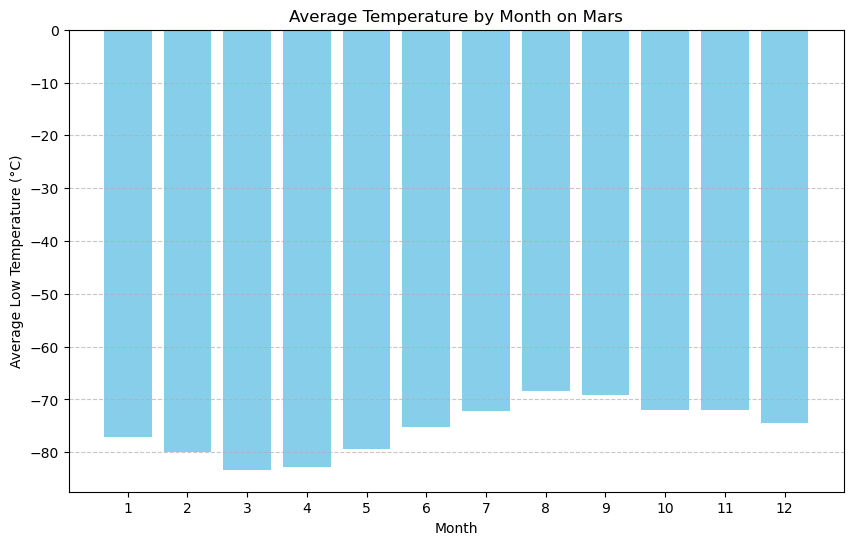

In [71]:
import matplotlib.pyplot as plt

# Assuming you have already calculated average_low_temp_by_month

# Plot the average temperature by month as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_low_temp_by_month.index, average_low_temp_by_month.values, color='skyblue')
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13))  # Assuming months are numbered from 1 to 12
plt.show()


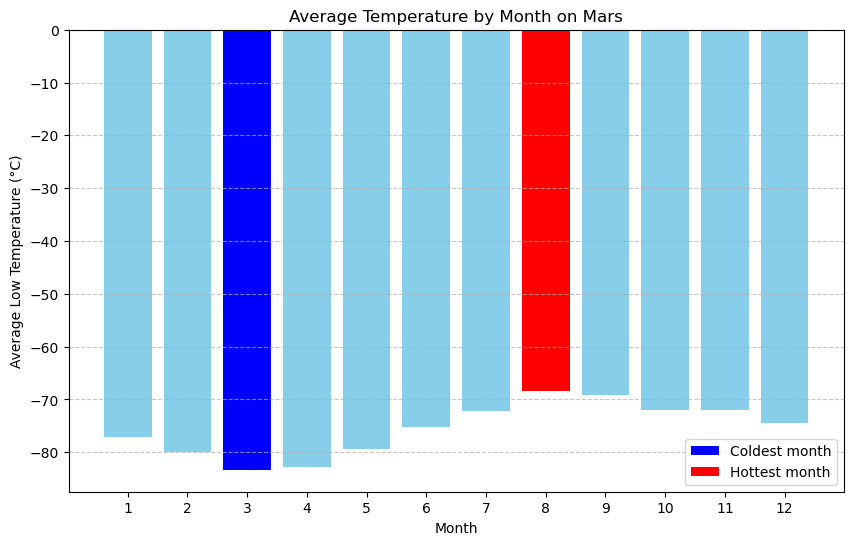

In [73]:
# Identify the coldest and hottest months in Curiosity's location
import matplotlib.pyplot as plt

# Assuming you have already calculated average_low_temp_by_month and found coldest_month and hottest_month

# Plot the average temperature by month as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_low_temp_by_month.index, average_low_temp_by_month.values, color='skyblue')

# Highlight the coldest and hottest months
plt.bar(coldest_month, average_low_temp_by_month[coldest_month], color='blue', label='Coldest month')
plt.bar(hottest_month, average_low_temp_by_month[hottest_month], color='red', label='Hottest month')

plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13))  # Assuming months are numbered from 1 to 12
plt.legend()
plt.show()



In [74]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

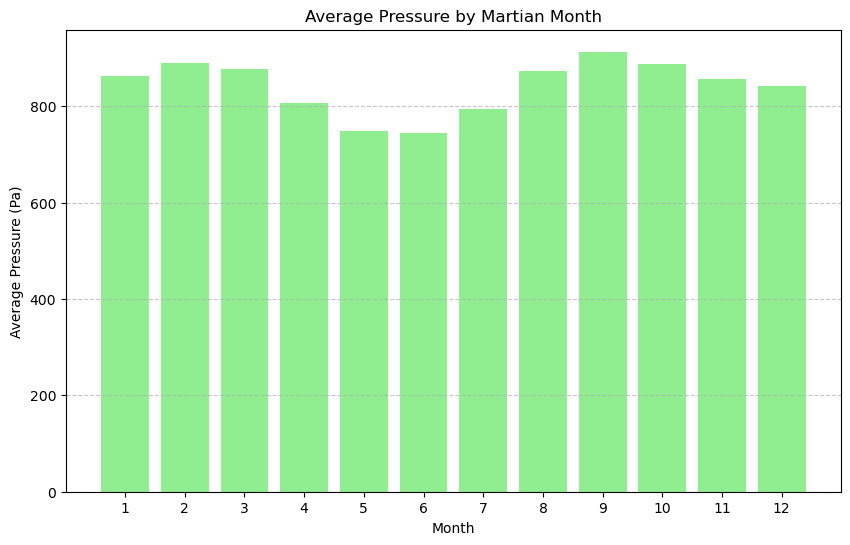

In [75]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='lightgreen')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13))  # Assuming months are numbered from 1 to 12
plt.show()

In [83]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Define the length of a Martian year in Earth days
martian_year_days = 687

# Print the result
print("There are", martian_year_days, "terrestrial (Earth) days in a Martian year.")

There are 687 terrestrial (Earth) days in a Martian year.


TypeError: float() argument must be a string or a real number, not 'ellipsis'

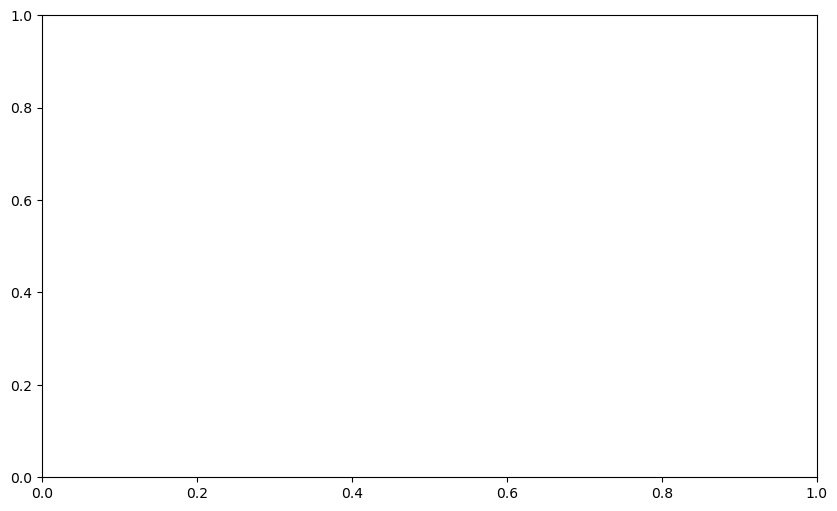

In [84]:
import matplotlib.pyplot as plt

# Assuming you have actual data for the number of terrestrial days and corresponding minimum temperature
# Example data
terrestrial_days = [...]  # Provide the number of terrestrial days here
min_temperature = [...]   # Provide the corresponding minimum temperature here

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(terrestrial_days, min_temperature, marker='o', linestyle='-', color='blue')
plt.title('Number of Terrestrial Days vs. Minimum Temperature on Mars')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [86]:
# Write the data to a CSV
df = pd.DataFrame(data)

# Write the data to a CSV file
df.to_csv('your_file_name.csv', index=False)

In [87]:
browser.quit()